## Role of bias in Neural Network

![data](.\images\neuron.png)

## Import Packages

In [1]:
# Load libraries
import math
import numpy as np
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(5,5), dpi=100)
plt.rc('font', size=8)

## Generate data

In [2]:
from numpy.random import seed
seed(1234)
N = 1000  # num_samples_per_class
C = 2 # num of class
D = 2 # number of dimension
X = np.zeros((N * C, D))
y = np.zeros((N * C))
for c in range(C):
    index = 0
    t = np.linspace(0, 1, N)
    inner_var = np.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + np.random.normal(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * np.float32((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", X.shape)
print("y:", y.shape)

Shapes:
X: (2000, 2)
y: (2000,)


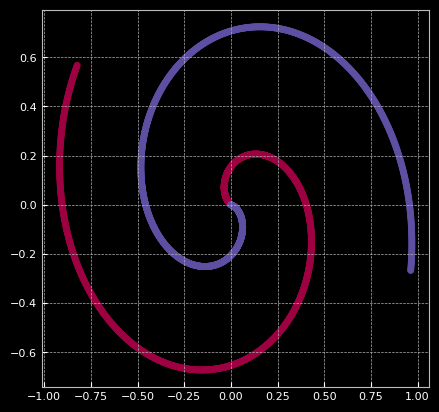

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)

## Build Model

In [5]:
def build_network(X, y, input_dim, Hidden, activation='linear', epoch=200, bias=True):
    # Define model layers
    input  = Input(shape=(input_dim,))    
    layer1 = Dense(Hidden, use_bias=bias)(input)
    layer1 = Activation(activation)(layer1)
    output = Dense(1, activation='sigmoid')(layer1)
    model  = Model(inputs=input, outputs=output)
    
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(1e-3), 
                  metrics=['accuracy'])

    # Training
    model.fit(X, y, epochs=epoch, verbose=0)
    
    # Prediction
    prediction = model.predict(X)
    accuracy = accuracy_score(y, prediction>0.50)
    print(f'Accuracy is {accuracy}\n')
    
    # Plot decision Boundary
    plt.figure(dpi=150)
    plt.title(f'Model Decision Boundary (hidden unit {Hidden}) for {activation} activation. Total Model accuracy is {accuracy}')    
    plot_decision_regions(X, y.astype(int).ravel(), clf=model, legend=2)
    plt.axis('off')
    return model

## Model with relu activation with Bias

A neural network learns by accumulation of all the bits and pieces learnt by each neuron. This is the same as how we can approximate a curved function by putting together many line segments

Accuracy is 0.993



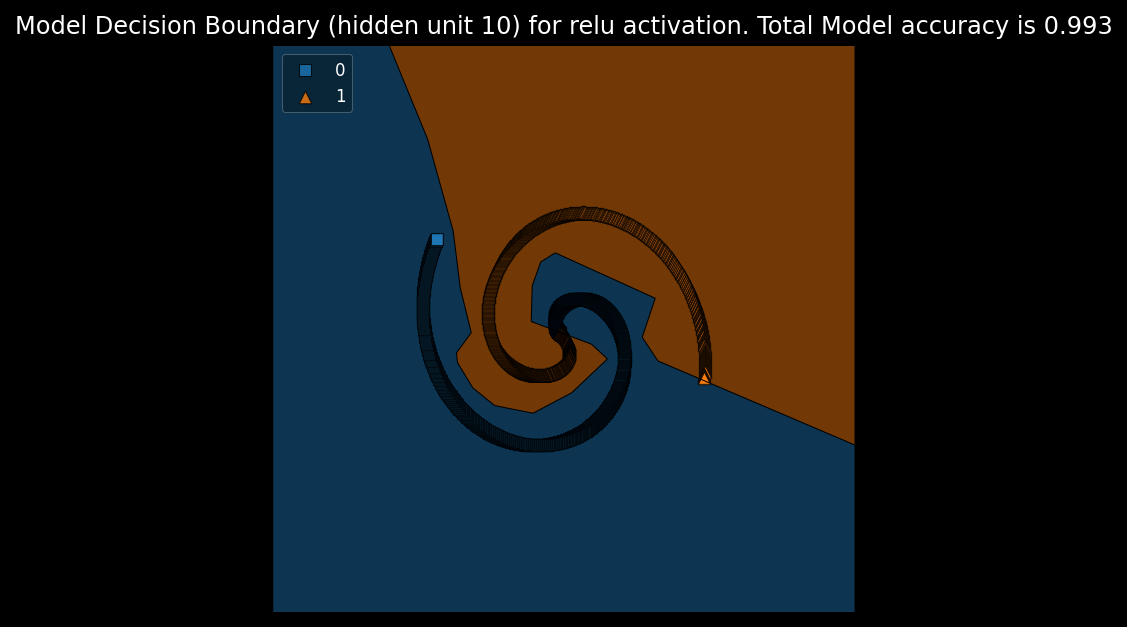

In [6]:
relu_activation_model_with_bias = build_network(X, y, input_dim=2, Hidden=10, activation='relu',epoch=200,bias=True)

## Model with relu activation without Bias


Such a model is not very flexible. It means that the line needs to go through the point (0, 0). A Slope of the line may change, however, it is tied to the coordinate system’s origin. Take a look at this visualization:

![data](.\images\bias_role.gif)


To gain more flexibility we need to get back to the original model with bias. It will equip us with weight w₀, not tied to any input. This weight allows the model to move up and down if it’s needed to fit the data.

That’s the reason why we need bias neurons in neural networks. Without these spare bias weights, our model has quite limited “movement” while searching through solution space.

![data](.\images\bias_role_1.gif)

Image reference taken from https://towardsdatascience.com/why-we-need-bias-in-neural-networks-db8f7e07cb98

Accuracy is 0.5255



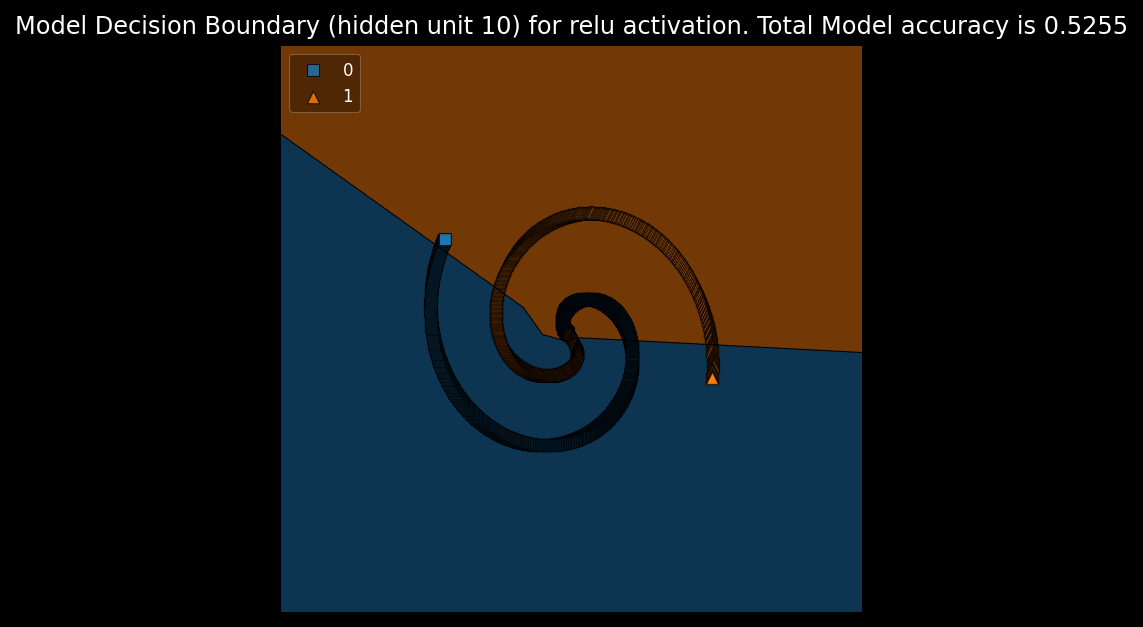

In [7]:
relu_activation_model_without_bias = build_network(X, y, input_dim=2, Hidden=10, activation='relu',epoch=200, bias=False)

Accuracy is 0.522



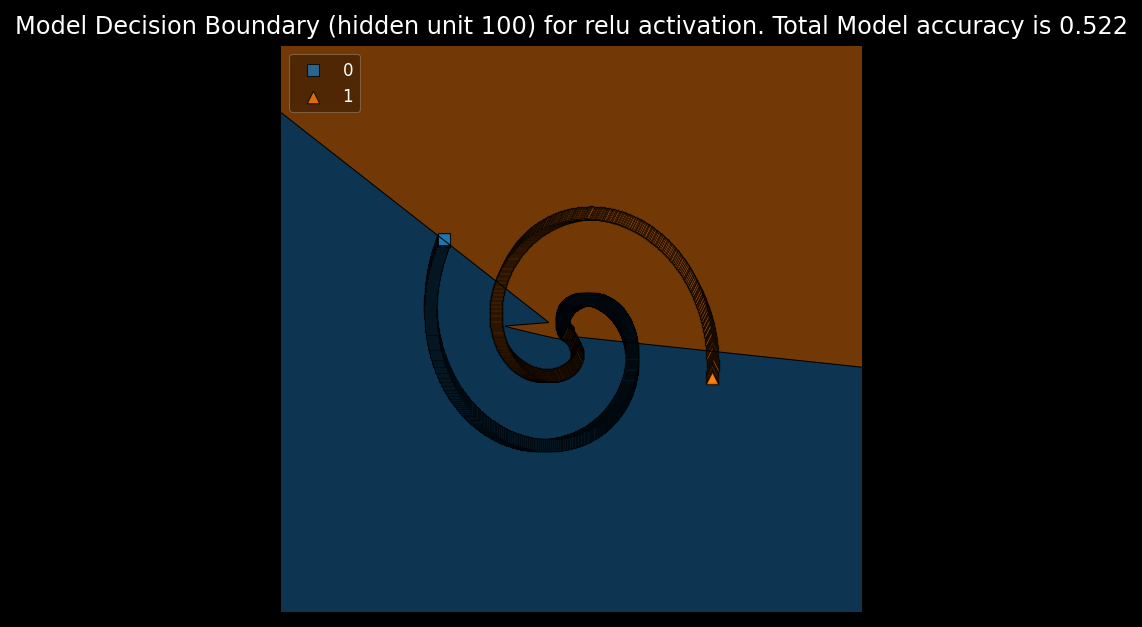

In [8]:
relu_activation_model_without_bias = build_network(X, y, input_dim=2, Hidden=100, activation='relu',epoch=200, bias=False)